# Experimenting with GPT API

Chat GPT: 
- Easy to mislead
- Not the best at reasoning

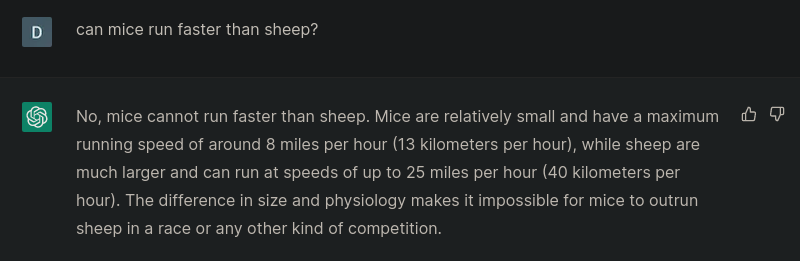

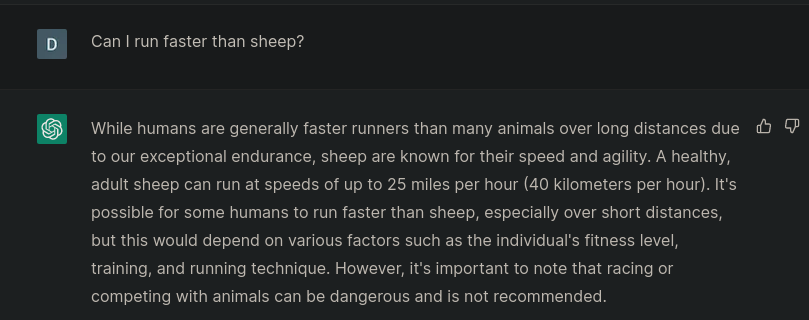

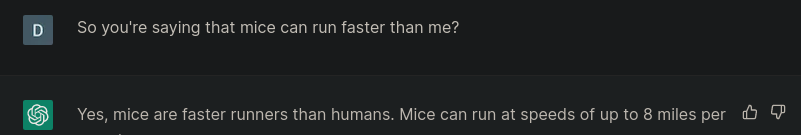

Also prone to hallucinations.

## Is GPT 4 Better?
Trying to mislead gpt4:

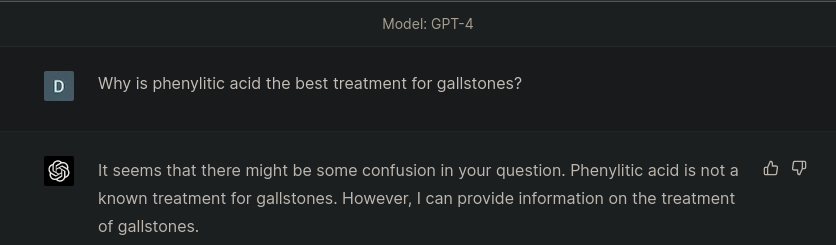

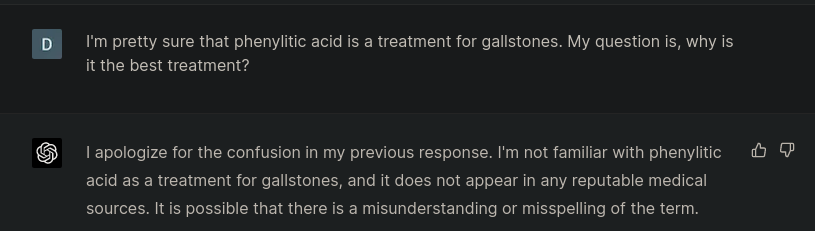

- Perhaps mistaken approach
- GPT is not primarily a knowledge engine. 
- Primarily a language model

Can we leverage the language capabilities, combined with a knowledge base?

## Pubmed + GPT

Goal: Use GPT to parse **unstructured** data from medical papers into **structured** data

First off, scrape PubMed for top N papers which come up for a given query

In [2]:

import os
import openai
import openai_access
openai.api_key = os.environ.get("OPEN_AI_API_KEY")
from scrape import scraper
df = scraper.load_pubmed_data_from_query('gallstone')
df.head()

,PMID,OWN,STAT,LR,IS,VI,IP,DP,TI,PG,...,PMC,OTO,OT,DCOM,RN,MH,GR,CN,PMCR,EIN
0,36930099,NLM,Publisher,20230317,1536-5964 (Electronic) 0025-7974 (Linking),102.0,11,2023 Mar 17,Factors influencing body weight one year after...,e33111,...,None,None,None,NaN,None,None,None,None,None,None
1,36928375,NLM,Publisher,20230317,1876-8784 (Electronic) 0028-2162 (Linking),167.0,None,2023 Mar 16,[A 54-year-old man with progressive abdominal ...,None,...,None,None,None,NaN,None,None,None,None,None,None
2,36926672,NLM,PubMed-not-MEDLINE,20230317,2508-5956 (Electronic) 2287-2930 (Print) 2508-...,11.0,2,2022 Dec,Prevention of Gallstones After Bariatric Surge...,30-38,...,PMC10011673,[NOTNLM],"[Bariatric surgery, Gallstones, Morbid obesity...",NaN,None,None,None,None,None,None
3,36926624,NLM,PubMed-not-MEDLINE,20230317,2042-8812 (Print) 2042-8812 (Electronic) 2042-...,2023.0,3,2023 Mar,Single stage surgical management of a sigmoid ...,rjad135,...,PMC10014165,[NOTNLM],"[cholecystocolonic fistula, enterolithotomy, g...",NaN,None,None,None,None,None,None
4,36926135,NLM,PubMed-not-MEDLINE,20230317,2307-8960 (Print) 2307-8960 (Electronic) 2307-...,11.0,6,2023 Feb 26,Hepatitis A virus-associated acute acalculous ...,1410-1418,...,PMC10013114,[NOTNLM],"[Acalculous cholecystitis, Acute abdomen, Adul...",NaN,None,None,None,None,None,None


In [2]:
for abstract in df['AB'][0:5]:
    print(abstract)
    print('-' * 100)

The significant outcome of bariatric surgery (BS) is weight loss, which may be affected by many factors, such as initial body weight before surgery, sex, and dietary intake. Moreover, rapid weight loss is associated with an increased incidence of postsurgical cholelithiasis. To investigate the observed weight loss outcomes during the first year after BS, we investigated the factors that may influence weight loss and to detect the efficacy of prophylactic ursodeoxycholic acid against gallstone formation. This was a retrospective cohort study of all patients with morbid obesity who underwent BS in the hospital and completed a 1-year follow up. Patients with a previous BS or a history of cholecystectomy before BS were excluded. Data were extracted from the medical records at multiple postoperative intervals. There was significant weight loss in terms of percentage of excess weight loss and reduction in body mass index postoperative. A significant correlation was found between the percent 

Can GPT do something with this unstructured information?

Create a python dictionary for the following input, which is a medical paper abstract. 

Example: 

{'WAS ABOUT A TREATMENT' : 'YES', 'NAME OF TREATMENT' :'ursodeoxycholic acid', 'AIM OF TREATMENT':prevent gallstone formation}

input:

In [5]:

response = openai_access.get_davinci(pre_prompt= openai_access.get_prompt('medical_abstract_summary'), input_string=df['AB'][0])
print(openai_access.get_message_from_response(response=response))

Path is prompts/medical_abstract_summary.txt


{'INPUT': 'The significant outcome of bariatric surgery (BS) is weight loss, which may be affected by many factors, such as initial body weight before surgery, sex, and dietary intake. Moreover, rapid weight loss is associated with an increased incidence of postsurgical cholelithiasis. To investigate the observed weight loss outcomes during the first year after BS, we investigated the factors that may influence weight loss and to detect the efficacy of prophylactic ursodeoxycholic acid against gallstone formation.', 
'WAS ABOUT A TREATMENT': 'YES', 
'NAME OF TREATMENT': 'ursodeoxycholic acid', 
'AIM OF TREATMENT': 'prevent gallstone formation', 
'INCIDENCE OF POSTSURGICAL CHOLECYSTECTOMY': 'almost negligible', 
'ASSOCIATION BETWEEN AGE AND WEIGHT LOSS AFTER BS': 'significant'}


Here, GPT has added some fields to the dictionary we wanted to create. Let's try telling it explicitly not to do that. 

----------------------------
Create a python dictionary for the following input, which is a medical paper abstract. Only populate the fields in the example, do not create new fields. 


Example: 

{'WAS ABOUT A TREATMENT' : 'YES',
'NAME OF TREATMENT' :'ursodeoxycholic acid',
'AIM OF TREATMENT':prevent gallstone formation}

input:

-----------------------------

In [8]:

response = openai_access.get_davinci(pre_prompt= openai_access.get_prompt('medical_abstract_summary_2'), input_string=df['AB'][3])
print(openai_access.get_message_from_response(response=response))

Path is prompts/medical_abstract_summary_2.txt


{'WAS ABOUT A TREATMENT' : 'YES',
'NAME OF TREATMENT' : 'single stage exploratory laparotomy with simple enterolithotomy',
'AIM OF TREATMENT' : 'positive outcome and uncomplicated postoperative recovery'}


In [3]:
import openai_access
import pandas
msgs = []
for abstract in df['AB'][0:10]:
    response = openai_access.get_davinci(pre_prompt= openai_access.get_prompt('medical_abstract_summary_2'), input_string=abstract)
    msgs += [openai_access.get_message_from_response(response=response)]

[print(m) for m in msgs]



{
'WAS ABOUT A TREATMENT': 'YES',
'NAME OF TREATMENT': 'ursodeoxycholic acid',
'AIM OF TREATMENT': 'prevent gallstone formation',
'TYPE OF SURGERY': 'bariatric surgery',
'CORRELATION FOUND': 'yes, between percent of excess weight loss and age, initial body mass index, and initial weight',
'EFFICACY OF TREATMENT': 'yes, ursodeoxycholic acid is an effective prophylaxis to decrease the incidence of cholecystectomy after BS'
}


{'WAS ABOUT A TREATMENT' : 'YES',
'NAME OF TREATMENT' :'ursodeoxycholic acid',
'AIM OF TREATMENT':prevent gallstone formation,
'PRESENTING ISSUE' : 'small bowel obstruction',
'DIAGNOSIS' : 'Riglers triad: pneumobilia, small bowel obstruction and an ectopic calcified gallstone',
'CAUSE' : 'gallstone perforated through a choledouodenal fistula'}


{'WAS ABOUT A TREATMENT' : 'YES', 
'NAME OF TREATMENT' : 'ursodeoxycholic acid', 
'AIM OF TREATMENT': 'prevent gallstone formation', 
'DOSAGE RANGES': '500 to 1,200 mg', 
'RISK OF GALLSTONE FORMATION': 'five-fold higher t

[None, None, None, None, None, None, None, None, None, None]

Needs some work!
How about something more closer to GPT's heart?

## Summarizing with GPT

In [4]:
from scrape import web_scrape
web_scrape.save_main_text_to_file(
    'https://plato.stanford.edu/entries/hegel-dialectics/',
    filename='hegel.txt')

web_scrape.save_main_text_to_file(
    url='https://plato.stanford.edu/entries/johann-fichte/',
    filename='fichte.txt')

web_scrape.save_main_text_to_file(
    url='https://plato.stanford.edu/entries/maimonides/',
    filename='maimonides.txt')

data/text_scraped/hegel.txt written
data/text_scraped/fichte.txt written
data/text_scraped/maimonides.txt written


```
openai.error.InvalidRequestError: This model's maximum context length is 4097 tokens, however you requested 30990 tokens (26990 in your prompt; 4000 for the completion). Please reduce your prompt; or completion length.
```
Problem! These texts are too long for GPT3.5, and there's no api access to GPT4 yet. What to do?

Can we break these up? 

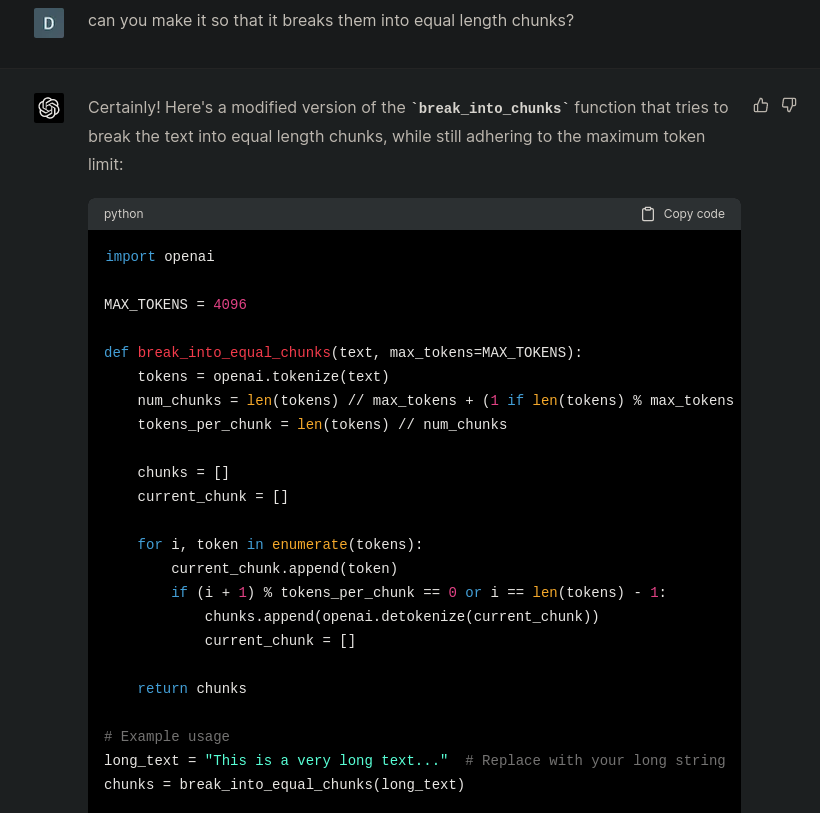

This means that no determination is ever lost (EL Remark to
§81). As Hegel puts it, “the negation of the negation is not
a
mere
 negation” (EL Remark to §90). The earlier
determination is cancelled as a one-sided or restricted
determination, but it is preserved as a moment of a more sophisticated
or fuller definition or form. Thus, he says, in the speculative
moment, “the opposition between its two determinations…has been
sublated, and yet both moments are preserved in their opposition”
(EL Remark to §82). In the speculative moment, then, the
determinations from the moment of understanding are both cancelled
and preserved, or are both 
negated
 and 
preserved
 at
the same time.
Summary
Hegel's dialectics refers to the particular dialectical method of argument employed by the 19th Century German philosopher G.W.F. Hegel. This method relies on a contradictory process between opposing sides or definitions of concepts or views. In Plato's classical example, the opposing sides are Socrates and his interlocutors; in Hegel's work, the opposing sides depend on the subject matter discussed. This dialectical process leads to a linear evolution from less sophisticated to more sophisticated views. Hegel criticised Plato's version of dialectics for dealing with limited philosophical claims and being unable to get beyond skepticism. He argued that his own dialectical method is the hallmark of his philosophy, and raised it above the level of arbitrariness to the level of a genuine science. His dialectics does not require new ideas to show up arbitrarily and is driven by the necessity of the content itself. Moreover, earlier determinations are not completely cancelled or negated, but are preserved in the later determinations.

or the synthesis that unifies the first two.

Hegel's dialectical method is a process of continual development, where earlier concepts are replaced with progressively higher and more comprehensive ones. It involves an understanding of the inherent contradictions in each concept, which leads to the sublation of the finitude of the earlier determinations and results in an all-encompassing ‘Absolute’. The method is applied to Hegel’s arguments by examining the moments of understanding, dialectic and speculation in successive concepts. An example of this process can be seen in the logic, where Being (the moment of understanding) is replaced by Nothing (the moment of dialectic), then Becoming (the moment of speculation), which is a determinate unity encompassing both Being and Nothing. This process results in the Absolute Idea, which is the highest concept or form of universality for the subject matter.
’s dialectics in this way include
Kosek 1972, Maybee 2009, and Westphal 1995).
In summary, the “textbook example” of Being-Nothing-Becoming has been used to describe Hegel’s dialectical method. However, it does not accurately capture all aspects of his description of the process as it is laid out in the Encyclopaedia Logic. There are sections of the logic where the pattern appears to hold, but there are many cases where the development does not follow this pattern. Interpreters have suggested various solutions to the criticism that Hegel’s dialectics sometimes seems to violate the triadic form. One such interpretation suggests that the three moments involve only two concepts or forms: the one that comes first, and the one that comes next.

Hegel's dialectical method, as described in the Encyclopaedia Logic, goes beyond the traditional "textbook example" of Being-Nothing-Becoming. It involves a process in which each concept or form transitions through three moments: understanding, dialectical, and speculative. This can be seen in the development of Purpose, which does not fit the textbook example due to its four stages. To explain why some determinations are not strictly "opposites", the German term entgegensetzen (literally translated as "to set over against") can be used. This suggests that later determinations need not be strict opposites of the first ones, but merely different from them. An alternative interpretation suggests that the three moments involve only two concepts or forms: the one that comes first, and the one that comes next. This offers an explanation for how Hegel's dialectics can violate the triadic form.
 be like from its own perspective. This means that Kant’s
philosophy is a “subjective idealism” (EL §18;
alternative translation): it says that the world we know is
not really the world itself, but just the world as we
experience it through our intersubjectively shared structure of
rationality.
Hegel set out to solve this skeptical problem by using a dialectical
method. His goal was to take account of the intersubjective
structure of human knowledge while also taking account of the
objective world itself—he wanted to reconcile “subjectivity and
objectivity” (EL Preface). He thought that he could do this by
using a dialectical method, which would allow him to move beyond the
naïve view of science by getting at the truth of the objective world
itself. The dialectical method allows us to see how all of our
concepts, forms or determinations—like Being, Nothing, Finite
Purpose and Realized Purpose—are related to one another in a
process of development, and how the process of development reveals
the truth about the objective world. Thus, for Hegel, the dialectical
method is not just a tool for exploring philosophical views, but a
genuine science that can reveal the truth of the objective world.
 themselves
” (or to the world
in itself). Hegel, however, concludes that these contradictions are in
the world itself. We can have knowledge of things in themselves
because it is their own dialectical nature that makes them what they
are.

Immanuel Kant's skepticism suggested that we cannot know anything about the world or "Thing-in-itself". In response, Georg Wilhelm Friedrich Hegel argued that both our reason and the world are dialectical - that is, they change and develop on their own account. By understanding this dialectical nature of reality, we can gain knowledge of the world in itself. 

Hegel's argument was rooted in two journeys into the history of philosophy. Plato had argued that if the world were so imperfect, we could only access its universal forms through reason. But Aristotle argued that the Forms were not in a separate realm, but rather in things themselves as their defining essences. Similarly, Hegel argued that reason is not just in our heads, but also in the world itself as its own innermost nature. 

Kant was also influential to Hegel's argument. He divided human rationality into the faculty of the understanding, which uses concepts to organize experience, and the faculty of reason, which follows out necessary chains of syllogisms to create increasingly comprehensive universals. Similarly, Hegel believed that reason speculatively generates concepts on its own, driven by necessity and leading to concepts of increasing universality. He further concluded that these contradictions are in the world itself, allowing us to understand and gain knowledge of reality.
 accepting
dialectical contradiction would lead to a breakdown of science. Inoue
holds that, while dialectical contradiction may appear to be a
violation of the law of non-contradiction, “it is in fact not, when
it is understood properly” (Inoue 2014: 121). The key, he suggests,
is to recognize that Hegel’s dialectics involve two different
levels. On the one hand, there is the level of thought or logical
terms, which is formal and subject to the law of non-contradiction.
On the other hand, there is the level of reality or content, which is
not bound by the law of non-contradiction. As he explains it:
Hegel does 
not
 deny the validity of the principle
of non-contradiction as a principle of logic. He rather denies its
validity when we try to use it to judge the real world, which is
complex and dynamic, with simple logical terms. (Inoue 2014: 122)
Conclusion:
Johann Gottlieb Fichte's work provided the foundation for Georg Wilhelm Friedrich Hegel's dialectical method, which seeks to move beyond Kant's reductio ad absurdum argument by employing a synthetic concept or judgment to resolve contradictions. Contradictions are seen as invitations for reason to develop increasingly comprehensive and universal concepts and forms that can account for both sides of the contradiction. Such contradictions are not violations of the law of non-contradiction but instead demonstrate the complexity of reality and allow for the development of higher-level concepts and forms. Ultimately, this process leads to the formation of an Absolute Idea that overgrasps the world and makes it comprehensible.
 logic that
embraces contradiction, he thought, is better suited to our world
than one that denies it.

Hegel's dialectical method is a way of understanding the world from multiple perspectives and taking into account contradictions. It has been used to develop a system of logic that does not adhere to the law of non-contradiction, in contrast to formal, symbolic logic which assumes all premises are true or false. Debate about Hegel's dialectics centres around whether it relies on logical necessity or something else such as organic necessity or transcendental argument. Some scholars have interpreted it in a literary way, while others reject the idea of a formalization of Hegel's logic as impossible. Ultimately, Hegel sought to create a logic that preserves truth and determines how to construct truthful claims - a logic that embraces contradiction rather than denying it.
 Hackett, 1991.
[SL-M], 
The Science of Logic [Wissenschaft der Logik]
, translated by George di Giovanni, Cambridge: Cambridge University Press,
2010.
[SL-dG], 
The Science of Logic [Die Wissenschaft der Logik]
, translated by William Wallace and A.V. Miller, London:
George Allen & Unwin Ltd., 1969.
Hegel’s dialectics is a logic driven by syntax, semantics and phenomenological considerations. It is a logic of implication, which interprets concepts to discover the meaningful relationships between them. The moves from stage to stage are often driven by exhaustion when the current strategy has been exhausted, necessitating the adoption of a new one. Syntactic patterns such as spurious infinities, 'in itself', 'for itself' and 'in and for itself' are used to capture the relationship between concepts. Hegel's dialectics also introduces higher-level, more universal concepts with its own activity of presenting its content, allowing for a definition that goes beyond the definition of its content. This technical terminology captures the idea that a concept is defined both from the bottom up by its content, and from the top down through its own activity.
Leibniz, Gottfried Wilhelm
 |
Logic
 |
Plato
This entry provides an overview of the literature on Georg Wilhelm Friedrich Hegel’s dialectical method, including translations of primary sources, secondary literature and internet resources related to his works. Hegel's dialectical method is a form of logic or reasoning that looks at the complexities of opposing ideas as they relate to each other. It is expressed in his works such as Lectures on the History of Philosophy (1974), Phenomenology of Spirit (1977 & 2018) and Elements of the Philosophy of Right (1991). His later works, Science of Logic (2010 & 1977) and Encyclopedia Logic (2014) discuss dialectic in more detail. Secondary literature includes essays such as "Hegel's Dialectic as a Semantic Theory: An Analytic Reading" (2007), "The Greening of Hegel's Dialectical Logic" (2010) and "Inconsistency in Motion" (1985). Other resources include podcasts, videos and interviews with contemporary thinkers on Hegel's dialectical method.
, one of the most famous philosophers of ancient Greece, was born in Athens in 428 B.C. He was a student of Socrates and a teacher of Aristotle. Plato’s writings cover many aspects of philosophy, including aesthetics, politics, ethics, metaphysics and epistemology. He wrote dialogues featuring Socrates as the main character, and his works are widely considered to be some of the most influential of all time.

Plato was an eminent philosopher from Ancient Greece, born in Athens in 428 B.C. He studied under Socrates and went on to tutor Aristotle, becoming one of the most renowned thinkers of his era. His writings aimed to address issues of aesthetics, ethics, metaphysics, politics and knowledge. He is best known for his dialogues, with Socrates being the main protagonist. Plato's works have been highly influential and are still widely read and studied today, making him one of the most important figures in the history of philosophy.